## import
* 관용적으로 sns라는 별칭 사용
* matplotlib.pyplot과 호환

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 전역 설정

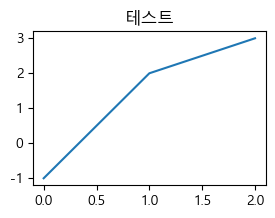

In [2]:
# ----------------------------------
# font 전역설정
# ----------------------------------
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
pd.Series([-1,2,3]).plot(title='테스트', figsize=(3,2))

# ----------------------------------
# figsize 전역설정
# ----------------------------------
plt.rc('figure', figsize=(4,3))

## 샘플 데이터 준비

In [3]:
import seaborn as sns
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')

## Seaborn 사용법
* `sns.그래프(x축데이터, y축데이터)`
* `sns.그래프(data=데이터프레임, x='x축컬럼명', y='축컬럼명')`
>* 주요 파라미터
>  * `hue` = '그룹기준컬럼명'
>  * `estimator` = 집계함수(bar그래프)

## barplot

In [4]:
# --------------------
# tips
# --------------------

tips.sample(10)

,total_bill,tip,sex,smoker,day,time,size
17,16.29,3.71,Male,No,Sun,Dinner,3
120,11.69,2.31,Male,No,Thur,Lunch,2
133,12.26,2.00,Female,No,Thur,Lunch,2
53,9.94,1.56,Male,No,Sun,Dinner,2
231,15.69,3.00,Male,Yes,Sat,Dinner,3
40,16.04,2.24,Male,No,Sat,Dinner,3
225,16.27,2.50,Female,Yes,Fri,Lunch,2
176,17.89,2.00,Male,Yes,Sun,Dinner,2
58,11.24,1.76,Male,Yes,Sat,Dinner,2
151,13.13,2.00,Male,No,Sun,Dinner,2


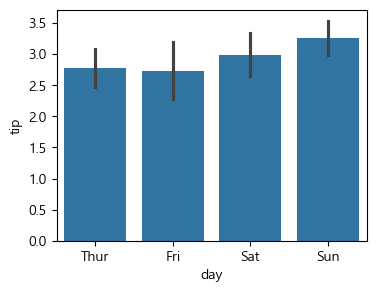

Signature:
sns.barplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    estimator='mean',
    errorbar=('ci', 95),
    n_boot=1000,
    seed=None,
    units=None,
    weights=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    hue_norm=None,
    width=0.8,
    dodge='auto',
    gap=0,
    log_scale=None,
    native_scale=False,
    formatter=None,
    legend='auto',
    capsize=0,
    err_kws=None,
    ci=<deprecated>,
    errcolor=<deprecated>,
    errwidth=<deprecated>,
    ax=None,
    **kwargs,
)
Docstring:
Show point estimates and errors as rectangular bars.

A bar plot represents an aggregate or statistical estimate for a numeric
variable with the height of each rectangle and indicates the uncertainty
around that estimate using an error bar. Bar plots include 0 in the
axis range, and they are a good choice when 0 is a meaningful value
for the variable to take.

See the :ref:`tutorial 

In [5]:
# ------------------------
# 요일별 tip 평균
# ------------------------
sns.barplot(data=tips, x = "day", y = 'tip', estimator='mean')
sns.barplot?


<Axes: xlabel='day', ylabel='tip'>

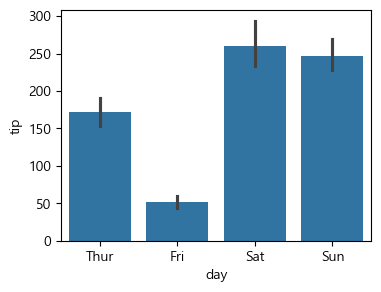

In [6]:
# ------------------------
# 요일별 tip 합계
# ------------------------
sns.barplot(data=tips, x = "day", y = 'tip', estimator='sum')

<Axes: xlabel='sex', ylabel='tip'>

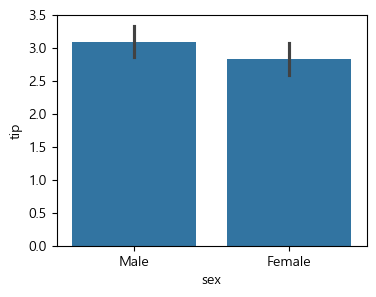

In [7]:
# -----------------------------------
# 성별 팁 평균
# -----------------------------------

sns.barplot(data=tips, x = 'sex', y = 'tip')


<Axes: xlabel='sex', ylabel='tip'>

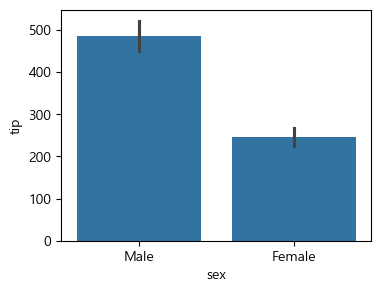

In [8]:
# -----------------------------------
# 성별 팁 합계
# -----------------------------------
sns.barplot(data=tips, x = 'sex', y = 'tip', estimator='sum')

In [9]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='day', ylabel='tip'>

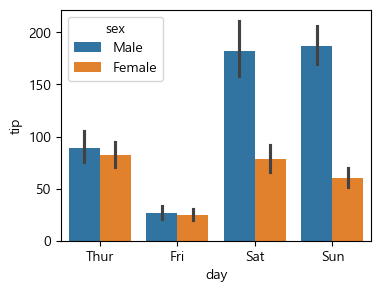

In [10]:
# -----------------------------------
# 요일별 평균을 그린다.
#   - 각 막대를 성별로 구분한다(중첩막대)
#   - hue 옵션 사용
# -----------------------------------
sns.barplot(data=tips, x = "day", y = 'tip', hue='sex', estimator='sum')


## scatterplot
* hue : 색깔로 구분
* size : 데이터의 크기 표현

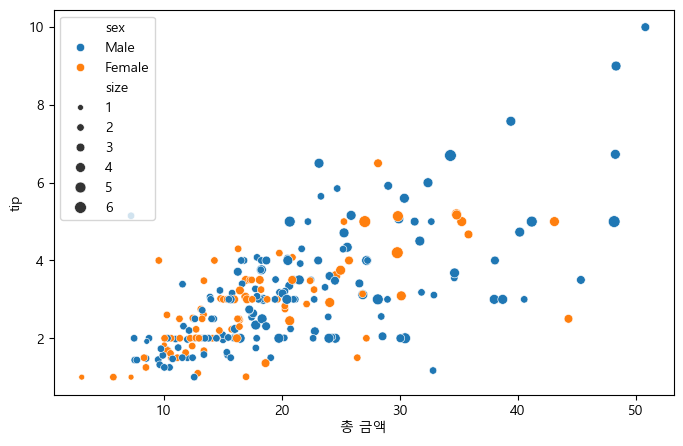

In [11]:
# -----------------------------------
# 지불금액(total_bill)에 따른 팁(tip)
#   - 점의 색으로 성별 구분
#   - 점의 크기로 테이블 인원수(size) 구분
# -----------------------------------

plt.figure(figsize=(8,5))
sns.scatterplot(data=tips, x = 'total_bill', y = 'tip', hue='sex', size='size')
plt.xlabel("총 금액")
pass

## regplot
* 회귀 시각화
    * 산점도와 함께 선형회귀선을 그려줌
    * 두 변수 간의 관계를 시각적으로 분석할 때 유용
* 그래프 스타일 
    * scatter_kws : 산점도 스타일
    * line_kws : 회귀선 스타일

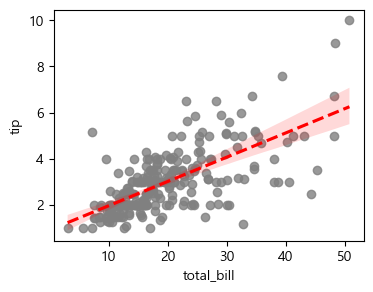

In [12]:
# -----------------------------
# total_bill과 tip의 산점도와 선형회귀선
# 산점도 스타일 : scatter_kws
# 회귀선 스타일 : line_kws
# -----------------------------
sns.regplot(data=tips, x='total_bill', y='tip',
            scatter_kws={'color':'gray'},
            line_kws={'color':'red', 'linestyle':'--'})
plt.show()


## boxplot

<Axes: xlabel='tip'>

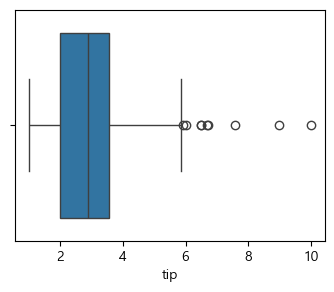

In [13]:
# -----------------------------
# tip의 분포(가로모양)
# -----------------------------
sns.boxplot(data=tips, x="tip")

<Axes: ylabel='tip'>

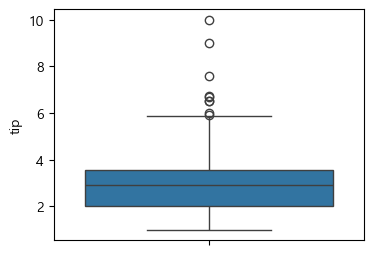

In [14]:
# -----------------------------
# tip의 분포(세로모양)
# -----------------------------
sns.boxplot(data=tips, y="tip")

<Axes: ylabel='tip'>

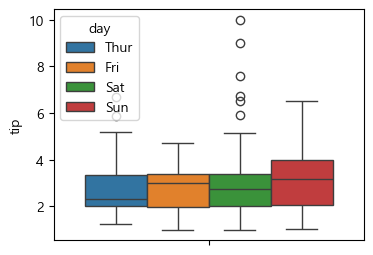

In [15]:
# -----------------------------
# 요일별 tip의 분포
# -----------------------------
sns.boxplot(data=tips, y="tip", hue='day')

<Axes: xlabel='day', ylabel='tip'>

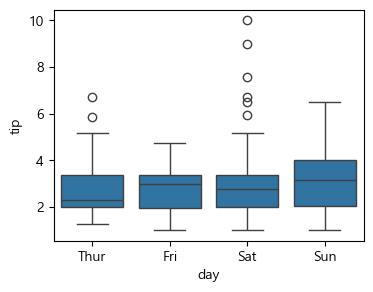

In [16]:
# -----------------------------
# 요일별 tip의 분포
# -----------------------------
sns.boxplot(data=tips, x="day", y="tip")

<Axes: xlabel='day', ylabel='tip'>

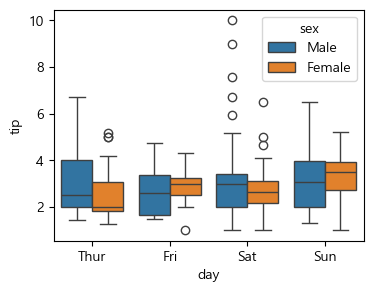

In [17]:
# -----------------------------
# 요일별 tip의 분포를 성별로 구분
# -----------------------------
sns.boxplot(data=tips, x="day", y="tip", hue='sex')

## violinplot

<Axes: xlabel='size', ylabel='tip'>

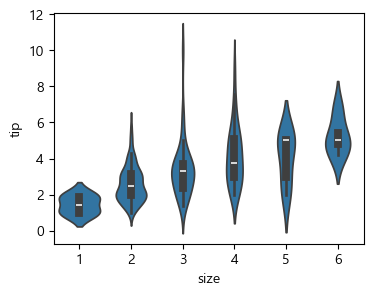

In [18]:
# ---------------------
# 테이블 인원에 따른 팁의 분포
# ---------------------
sns.violinplot(data=tips,
               x = 'size',
               y='tip')

In [19]:
# -------------
# titanic
# -------------

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## histplot
* kde(커널밀도추정)
    * 데이터의 분포를 부드럽게 그린 곡선 형태의 그래프

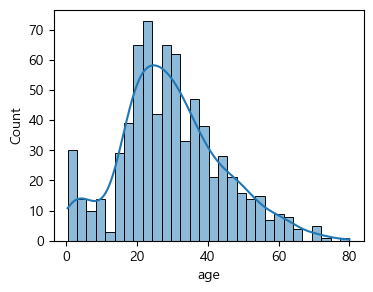

In [21]:
# ---------------------
# titanic - age의 분포 (히스토그램)
# ---------------------
sns.histplot(data=titanic, x='age', bins=30,
             kde=True);

## countplot
* 데이터의 빈도수 시각화
* `sns.histplot(data=데이터프레임, x='범주형컬럼')`

In [22]:
# ---------------------
# titanic - who의 빈도수
# ---------------------
titanic['who'].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='who'>

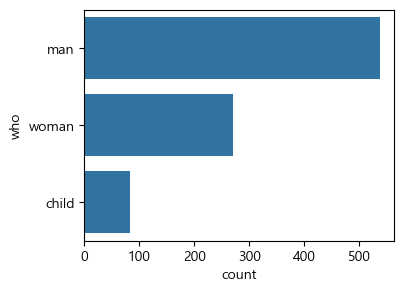

In [24]:
# ---------------------
# titanic - who의 빈도수 시각화
# ---------------------
sns.countplot(data=titanic, y='who')


<Axes: xlabel='who', ylabel='count'>

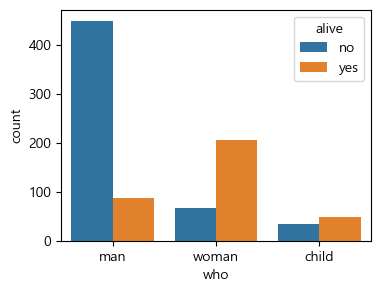

In [25]:
# ---------------------
# titanic - who의 빈도수 시각화 결과에서
# 각 범주를 한번 더 나누기 ()
# ---------------------

sns.countplot(data=titanic, x='who', hue='alive')


In [28]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## heatmap

In [33]:
# 상품군 리스트
categories = ['의류', '가전', '식품', '생활용품', '뷰티', '스포츠', '도서']

# 월 리스트
months = ['1월', '2월', '3월', '4월', '5월', '6월', 
          '7월', '8월', '9월', '10월', '11월', '12월']

# 랜덤한 매출 데이터 생성
np.random.seed(42)
data = np.random.randint(50, 500, size=(len(categories), len(months)))

# DataFrame 생성
df_sales = pd.DataFrame(data, index=categories, columns=months)
df_sales


,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
의류,152,485,398,320,156,121,238,70,152,171,264,380
가전,137,422,149,409,201,180,199,358,307,393,463,343
식품,435,241,493,326,210,363,71,302,285,394,98,108
생활용품,219,237,320,239,495,224,495,100,413,104,293,369
뷰티,180,356,184,70,378,216,323,437,138,365,63,291
스포츠,314,395,102,435,389,141,416,493,477,313,480,84
도서,255,130,469,99,409,437,51,439,103,155,309,359


<Axes: >

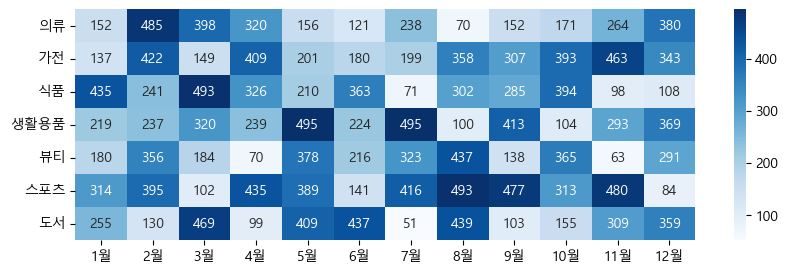

In [38]:
plt.figure(figsize=(10,3))
sns.heatmap(df_sales, cmap='Blues', annot=True, fmt='d')

## pairplot
* 수치형 변수간의 관계를 한눈에 시각화
    * 수치형 변수들 간의 조합별 scatterplot, 히스토그램/kde를 행열 형태로 시각화
* cmap : https://seaborn.pydata.org/tutorial/color_palettes.html

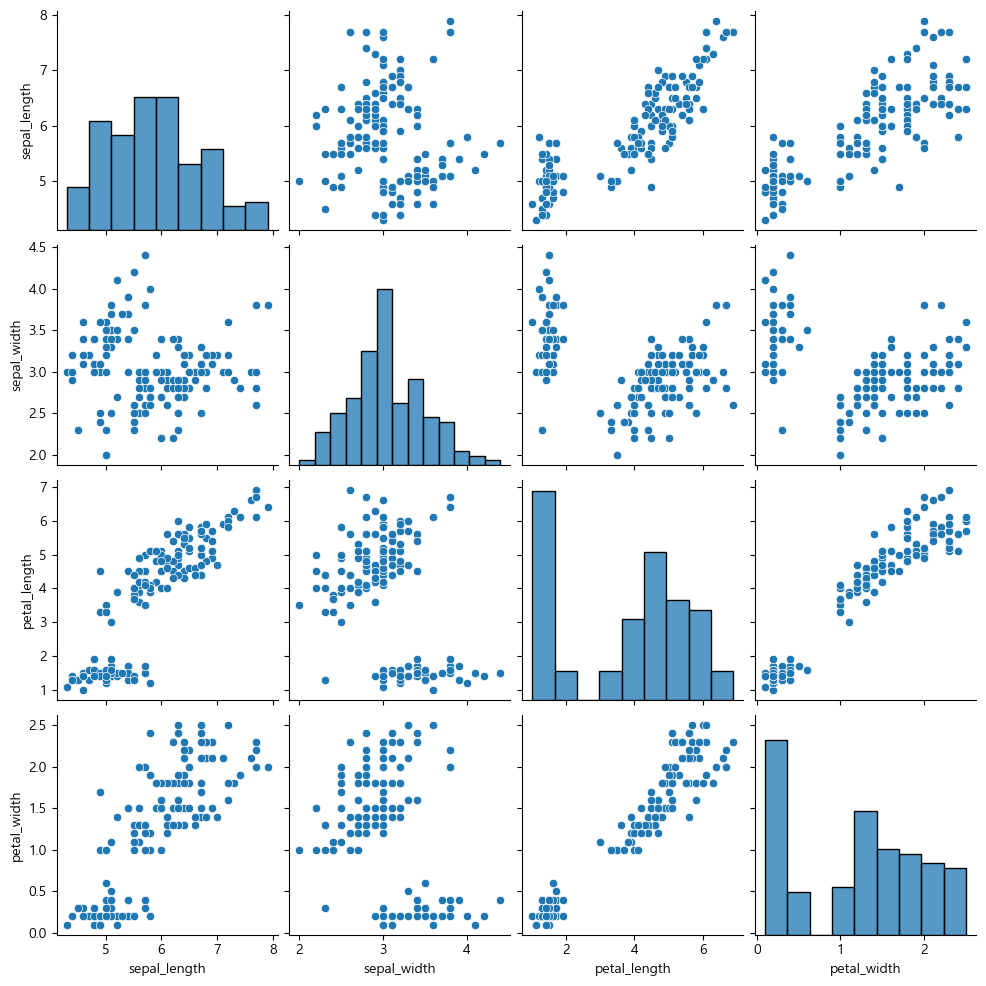

In [29]:
sns.pairplot(iris)

In [30]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


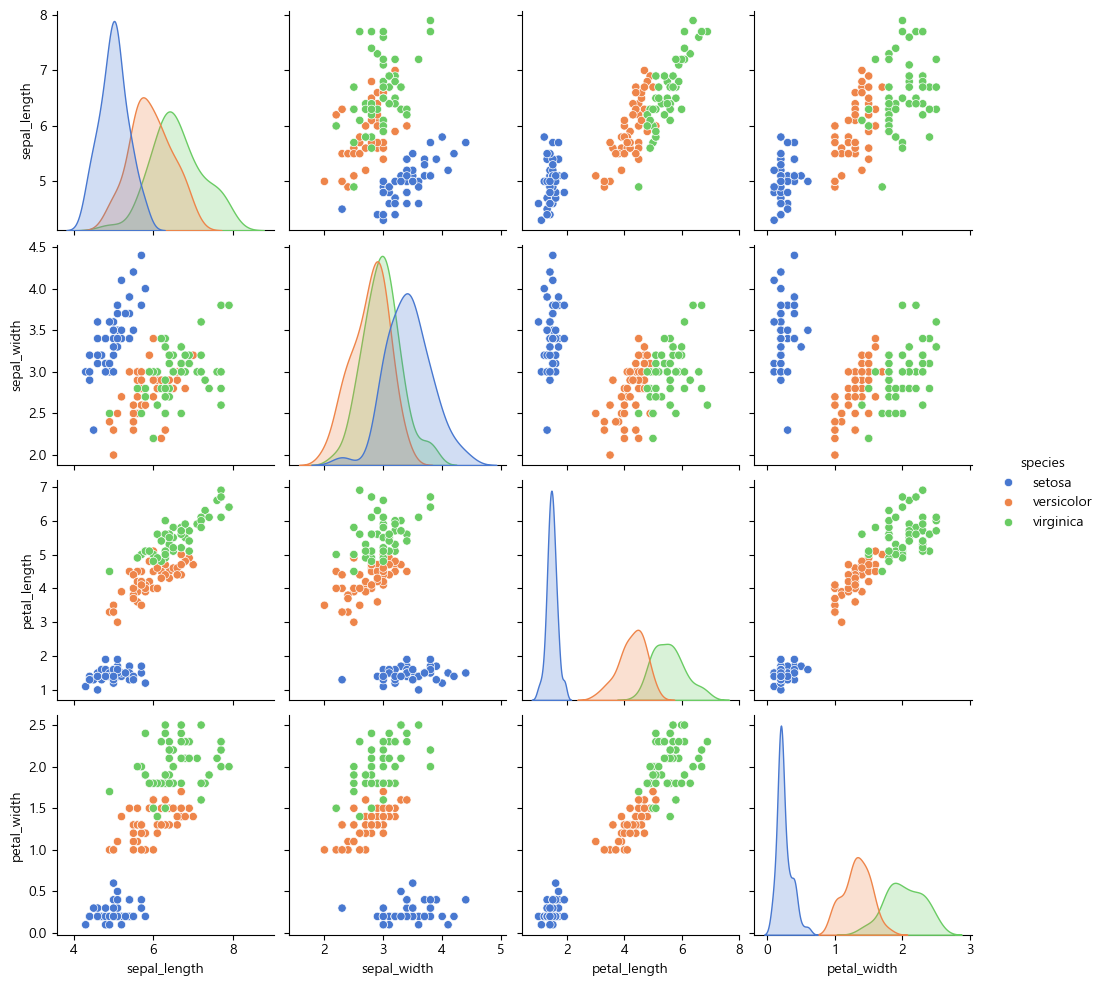

In [32]:
sns.pairplot(iris, hue='species', palette='muted')